<a href="https://colab.research.google.com/github/mehrotrasan16/CS581-CAN-DO-Project/blob/tcn-baseline/code/TCN_CAN_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
from numpy import load
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Load Datasets

In [3]:
freedf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CS581/project-data/Attack_free_dataset.csv')
freedf['label'] = 0
freedf

,Timestamp,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,label
0,0.000000,790,0,8,5,32,234,10,32,26,0,127,1
1,0.000224,809,0,8,215,167,127,140,17,47,0,16,1
2,0.000462,128,0,8,0,23,234,10,32,26,32,67,1
3,0.000704,129,0,8,127,132,96,0,0,0,0,83,1
4,0.000878,288,0,4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369393,1037.589395,68,0,8,0,0,0,255,111,0,0,0,1
2369394,1037.589628,357,0,8,17,232,127,0,0,0,12,138,1
2369395,1037.589812,688,0,5,35,0,0,7,172,0,0,0,1
2369396,1037.590065,1200,0,8,0,0,0,0,0,0,0,0,1


In [4]:
freedf.groupby('label').count()

,Timestamp,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
label,,,,,,,,,,,,
1,2369398,2369398,2369398,2369398,2369398,2369398,2369398,2369398,2369398,2369398,2369398,2369398


In [5]:
dosdf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CS581/project-data/DoS_attack_dataset.csv')
dosdf['label'] = np.where(dosdf['CAN ID'] == 0,1,0) #np.where(df['Set']=='Z', 'green', 'red')
dosdf

,Timestamp,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,label
0,0.000000,0,0,8,0,0,0,0,0,0,0,0,2
1,0.000271,128,0,8,0,23,220,9,22,17,22,187,1
2,0.000495,0,0,8,0,0,0,0,0,0,0,0,2
3,0.000736,129,0,8,64,132,135,0,0,0,0,107,1
4,0.000983,0,0,8,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
656574,306.295869,0,0,8,0,0,0,0,0,0,0,0,2
656575,306.296118,129,0,8,64,132,137,0,0,0,0,240,1
656576,306.296365,0,0,8,0,0,0,0,0,0,0,0,2
656577,306.296624,399,0,8,0,59,24,0,0,63,0,0,1


In [6]:
dosdf.groupby('label').count()

,Timestamp,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
label,,,,,,,,,,,,
1,320955,320955,320955,320955,320955,320955,320955,320955,320955,320955,320955,320955
2,335624,335624,335624,335624,335624,335624,335624,335624,335624,335624,335624,335624


In [7]:
fuzzydf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CS581/project-data/Fuzzy_attack_dataset.csv')
fuzzydf

,Timestamp,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
0,0.000000,544,0,8,41,197,38,85,106,103,2,93
1,0.000868,1201,0,8,94,81,207,183,76,153,170,151
2,0.001212,688,0,5,58,255,0,7,44,0,0,0
3,0.001452,357,0,8,0,8,128,2,0,0,12,134
4,0.001782,544,0,8,212,166,227,169,35,170,211,31
...,...,...,...,...,...,...,...,...,...,...,...,...
591985,347.330224,339,0,8,0,161,32,255,0,255,32,223
591986,347.330461,544,0,8,192,3,245,3,12,0,71,16
591987,347.330678,1440,0,8,166,32,82,109,167,238,124,226
591988,347.331050,1442,0,8,238,34,248,11,91,131,153,171


In [28]:
impersonatedf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CS581/project-data/Impersonation_attack_dataset.csv')
impersonatedf['label'] = np.where(impersonatedf['CAN ID'] == 356,1,0) 
impersonatedf

,Timestamp,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,label
0,1.481193e+09,1415,0,8,0,0,0,0,0,0,0,1,0
1,1.481193e+09,790,0,8,5,28,106,10,28,19,0,127,0
2,1.481193e+09,399,0,8,0,33,28,0,0,67,0,0,0
3,1.481193e+09,608,0,8,5,28,0,48,255,147,99,53,0
4,1.481193e+09,128,0,8,0,23,106,10,28,19,28,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995467,1.481193e+09,1508,0,3,0,2,0,0,0,0,0,0,0
995468,1.481193e+09,339,0,8,0,128,16,255,0,255,160,46,0
995469,1.481193e+09,357,0,8,14,216,127,0,0,0,3,170,0
995470,1.481193e+09,544,0,8,244,3,247,3,12,0,58,16,0


In [29]:
print(int('0x164',base=16))
impersonatedf.groupby('label').count()

356


,Timestamp,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
label,,,,,,,,,,,,
0,938000,938000,938000,938000,938000,938000,938000,938000,938000,938000,938000,938000
1,57472,57472,57472,57472,57472,57472,57472,57472,57472,57472,57472,57472


IN the above datasets, we have also added labels where possible, to try a supervised learning experiment.

### Combining Attack-free + DoS datasets 
 Here we work with the Attack-Free and DoS Datasets to get one less biased and slightly better distributed dataset to train and test on.

In [44]:
dosdf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CS581/project-data/DoS_attack_dataset.csv')
dosdf['label'] = np.where(dosdf['CAN ID'] == 0,1,0)
dosdf = dosdf.drop(labels=['Timestamp'],axis=1)
dosdf

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,label
0,0,0,8,0,0,0,0,0,0,0,0,1
1,128,0,8,0,23,220,9,22,17,22,187,0
2,0,0,8,0,0,0,0,0,0,0,0,1
3,129,0,8,64,132,135,0,0,0,0,107,0
4,0,0,8,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
656574,0,0,8,0,0,0,0,0,0,0,0,1
656575,129,0,8,64,132,137,0,0,0,0,240,0
656576,0,0,8,0,0,0,0,0,0,0,0,1
656577,399,0,8,0,59,24,0,0,63,0,0,0


In [45]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CS581/project-data/Attack_free_dataset.csv')
df['label'] = 0
df = df.drop(columns=['Timestamp'])
df

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,label
0,790,0,8,5,32,234,10,32,26,0,127,0
1,809,0,8,215,167,127,140,17,47,0,16,0
2,128,0,8,0,23,234,10,32,26,32,67,0
3,129,0,8,127,132,96,0,0,0,0,83,0
4,288,0,4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2369393,68,0,8,0,0,0,255,111,0,0,0,0
2369394,357,0,8,17,232,127,0,0,0,12,138,0
2369395,688,0,5,35,0,0,7,172,0,0,0,0
2369396,1200,0,8,0,0,0,0,0,0,0,0,0


* Here we toss out the timestamp column as in this approach it is not informative about the nature of the outlier.
* It also helps us balance out the problems encountered in the previous attack-free and Dos attack experiments.

* in the attack free dataset - all the packets were normal data and so had to be labelled with only one value, training a model on single class data does not means it learns anything.

* in the Dos Attack experiment, every second message is a dos attack message, leaving the dataset evenly split 50:50 on anomalies/normal network data, but there is not enough contiguous network data for it to learn normal state nor attack state, and as a result it's accuracy is averaging around 50%

In [46]:
newdf = df.append(dosdf)
newdf

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,label
0,790,0,8,5,32,234,10,32,26,0,127,0
1,809,0,8,215,167,127,140,17,47,0,16,0
2,128,0,8,0,23,234,10,32,26,32,67,0
3,129,0,8,127,132,96,0,0,0,0,83,0
4,288,0,4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
656574,0,0,8,0,0,0,0,0,0,0,0,1
656575,129,0,8,64,132,137,0,0,0,0,240,0
656576,0,0,8,0,0,0,0,0,0,0,0,1
656577,399,0,8,0,59,24,0,0,63,0,0,0


In [47]:
newdf.groupby('label').count()

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
label,,,,,,,,,,,
0,2690353,2690353,2690353,2690353,2690353,2690353,2690353,2690353,2690353,2690353,2690353
1,335624,335624,335624,335624,335624,335624,335624,335624,335624,335624,335624


In [48]:
335624/2690353

0.1247509155861703

# Effect of Model Size and Layers

# Installing and testing TCNs: Exploring applications

In [57]:
!pip install keras-tcn

In [11]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input, Model

from tcn import TCN, tcn_full_summary

batch_size, timesteps, input_dim = None, 20, 1

In [12]:
def get_x_y(size=1000):
    import numpy as np
    pos_indices = np.random.choice(size, size=int(size // 2), replace=False)
    x_train = np.zeros(shape=(size, timesteps, 1))
    y_train = np.zeros(shape=(size, 1))
    x_train[pos_indices, 0] = 1.0
    y_train[pos_indices, 0] = 1.0
    return x_train, y_train

In [13]:
i = Input(batch_shape=(batch_size, timesteps, input_dim))

o = TCN(return_sequences=False)(i)  # The TCN layers are here.
o = Dense(1)(o)

m = Model(inputs=[i], outputs=[o])
m.compile(optimizer='adam', loss='mse')

tcn_full_summary(m, expand_residual_blocks=True)

x, y = get_x_y()
m.fit(x, y, epochs=10, validation_split=0.2)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20, 1)]           0         
_________________________________________________________________
matching_conv1D (Conv1D)     (None, 20, 64)            128       
_________________________________________________________________
activation_2 (Activation)    (None, 20, 64)            0         
_________________________________________________________________
conv1D_0 (Conv1D)            (None, 20, 64)            192       
_________________________________________________________________
activation (Activation)      (None, 20, 64)            0         
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 20, 64)            0         
_________________________________________________________________
conv1D_1 (Conv1D)            (None, 20, 64)           

# Modifying this for our data and modifying our data for this TCN

In [58]:
tf.keras.backend.clear_session()

TCNs do not require the 3D input that LSTMs do, the Conv1D layers throw errors when we tried with the same input as the LSTMS, so we change our input data shape to work similar to the example referred to above.

### Old Train-Test Split

In [15]:
batch_size, timesteps, input_dim = None, 12, 1

In [17]:
# my x y training/testing data
series = dosdf.to_numpy()

n_rows = series.shape[0]
n_features = series.shape[1]

train_split = int(series.shape[0]*0.7)
val_split = int(series.shape[0]*0.8)
print(f'train split : {train_split}, val_split: {val_split}')

X_train, y_train = series[:train_split, :n_features-1], series[:train_split, -1] # -1 references the last column
X_valid, y_valid = series[train_split:val_split, :n_features-1], series[train_split:val_split, -1]
X_test, y_test = series[val_split:, :n_features-1], series[val_split:, -1]

print(f'{X_train.shape,y_train.shape,X_valid.shape, y_valid.shape, X_test.shape,y_test.shape}')

train split : 459605, val_split: 525263
((459605, 12), (459605,), (65658, 12), (65658,), (131316, 12), (131316,))


In [18]:
X_test[20].shape, y_test[20].shape

((12,), ())

In [19]:
tempx, tempy = get_x_y()
tempx[0].shape, tempy[0].shape

((12, 1), (1,))

### Train-test-split



In [ ]:
#Shuffle the dataset
newdf=newdf.sample(frac=1,random_state=200) #random state is a seed value 200 

series = newdf.to_numpy()
print(series.shape)

n_features = series.shape[1]
train_split = int(series.shape[0]*0.7)
print(f'train split : {train_split}')

val_split = int(series.shape[0]*0.8)

X_train, y_train = series[:train_split, :n_features-1], series[:train_split, -1] # -1 references the last column
X_valid, y_valid = series[train_split:val_split, :n_features-1], series[train_split:val_split, -1]
X_test, y_test = series[val_split:, :n_features-1], series[val_split:, -1]


(3025977, 12)
train split : 2118183


In [ ]:
#X_train stats
newdf[:train_split].groupby('label').count()

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
label,,,,,,,,,,,
0,1883438,1883438,1883438,1883438,1883438,1883438,1883438,1883438,1883438,1883438,1883438
1,234745,234745,234745,234745,234745,234745,234745,234745,234745,234745,234745


In [ ]:
#X_valid split
newdf[train_split:val_split].groupby('label').count()

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
label,,,,,,,,,,,
0,269110,269110,269110,269110,269110,269110,269110,269110,269110,269110,269110
1,33488,33488,33488,33488,33488,33488,33488,33488,33488,33488,33488


In [ ]:
#X_test
newdf[val_split:].groupby('label').count()

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
label,,,,,,,,,,,
0,537805,537805,537805,537805,537805,537805,537805,537805,537805,537805,537805
1,67391,67391,67391,67391,67391,67391,67391,67391,67391,67391,67391


### Baseline TCN Model

In [27]:
tf.keras.backend.clear_session()

In [26]:
i = Input(batch_shape=(batch_size, timesteps, input_dim))

o = TCN(return_sequences=False,
        nb_filters=64,
        kernel_size=2,
        nb_stacks=1,
        padding='same',
        use_skip_connections=False,
        dropout_rate=0.0,
        activation='relu',
        kernel_initializer='he_normal',
        use_batch_norm=True)(i)  # The TCN layers are here.
o = Dense(1)(o)

m = Model(inputs=[i], outputs=[o])
m.compile(optimizer='adam',
          loss='mse',
          metrics=['accuracy'])

tcn_full_summary(m, expand_residual_blocks=True)

early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
history = m.fit(X_train, y_train,
      validation_data=(X_valid,y_valid),
      epochs=10,
      batch_size=128,
      callbacks=[early_stop])

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 12, 1)]           0         
_________________________________________________________________
matching_conv1D (Conv1D)     (None, 12, 64)            128       
_________________________________________________________________
activation_38 (Activation)   (None, 12, 64)            0         
_________________________________________________________________
conv1D_0 (Conv1D)            (None, 12, 64)            192       
_________________________________________________________________
batch_normalization_24 (Batc (None, 12, 64)            256       
_________________________________________________________________
activation_36 (Activation)   (None, 12, 64)            0         
_________________________________________________________________
spatial_dropout1d_24 (Spatia (None, 12, 64)           

KeyboardInterrupt: ignored

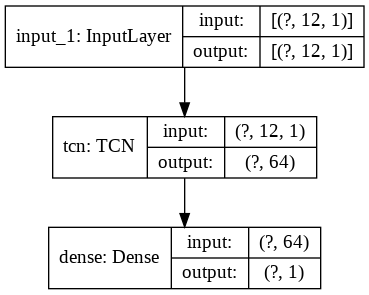

In [23]:
tf.keras.utils.plot_model(m,show_shapes=True)

### Evaluation and Plotting

In [21]:
scores = m.evaluate(X_test,y_test)
print(f"Accuracy, Loss: {scores}")

4104/4104 [==============================] - 13s 3ms/step - loss: 6.7758e-04
Accuracy, Loss: 0.0006775756482966244


NameError: ignored

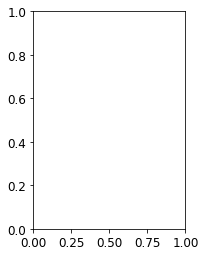

In [24]:
plt.subplot(1,2,1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(('loss','val_loss'))
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(('acc','val_acc'))

plt.gcf().set_size_inches((10,5))
plt.show()

In [ ]:
y_pred = rnnmodel.predict(X_test)

In [ ]:
X_test[30],y_test[30], np.argmax(y_pred[30])

(array([[830.082247],
        [129.      ],
        [  0.      ],
        [  8.      ],
        [127.      ],
        [132.      ],
        [109.      ],
        [  0.      ],
        [  0.      ],
        [  0.      ],
        [  0.      ],
        [131.      ]]), array([1.]), 1)

### Saving and Checking the size of the Model

In [ ]:
saved_model_dir = '/content/drive/MyDrive/Colab Notebooks/CS581/project-data/'
rnnmodel.save(saved_model_dir + "lstm-attackfree.h5",include_optimizer=False)
print(f"Saving Model to: {saved_model_dir}lstm-attackfree.h5")

Saving Model to: /content/drive/MyDrive/Colab Notebooks/CS581/project-data/lstm-attackfree.h5


In [ ]:
print(f'Size of the model without compression: {os.path.getsize(saved_model_dir + "lstm-attackfree.h5")/float(2**20)} Mb')

Size of the model without compression: 0.1733551025390625 Mb


# End